# 🧠 Environmental Risk Prediction Model

This model aims to identify and predict high-risk environmental zones based on features like distance to mines, forest cover loss, and reported illnesses. A Decision Tree Classifier is used to build the predictive model.

---
## 📌 Objective

- Predict **High Risk Zones** using environmental and health indicators.
- Train a **Decision Tree** classification model.
- Evaluate the model using classification metrics and visualize the results.


## 🛠️ Importing Required Libraries

We begin by importing essential Python libraries:

- **pandas**: for data manipulation and analysis  
- **sklearn**: for machine learning tools like decision trees, preprocessing, model selection, and evaluation metrics  
- **matplotlib & seaborn**: for data visualization  


In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



## 📁 Data Loading & Initial Exploration

We start by loading the dataset and visualizing the target distribution to understand the balance between high-risk and low-risk zones.


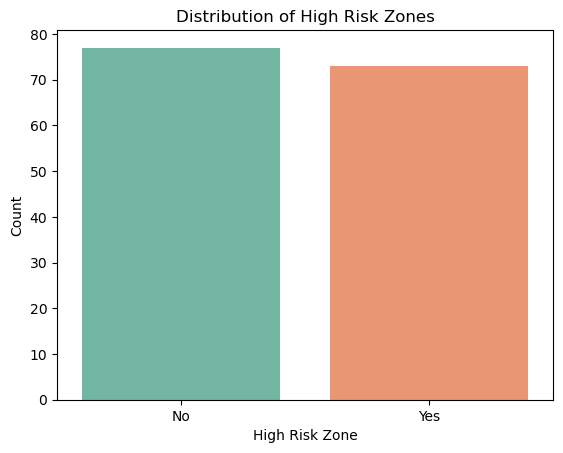

In [16]:

df=pd.read_csv("environmental_risk_data.csv")
sns.countplot(data=df, x='High_Risk_Zone', hue='High_Risk_Zone', palette='Set2', legend=False)
plt.title("Distribution of High Risk Zones")
plt.xlabel("High Risk Zone")
plt.ylabel("Count")
plt.savefig("distribution.png", dpi=300, bbox_inches='tight')
plt.show()




## 🔄 Data Preprocessing

- Encoded categorical variable `Zone` using `LabelEncoder`.
- Converted target variable `High_Risk_Zone` from "Yes/No" to 1/0.
- Split data into **features (X)** and **target (y)**.
- Used `train_test_split()` to divide data into training and testing sets.


In [17]:
# Encode categorical columns
le = LabelEncoder()
df["Zone"] = le.fit_transform(df["Zone"])
df["High_Risk_Zone"] = df["High_Risk_Zone"].map({"Yes": 1, "No": 0})

# Features and label
X = df.drop("High_Risk_Zone", axis=1)
y = df["High_Risk_Zone"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ✅ Model Evaluation

The function `print_score` evaluates the model using:
- **Accuracy**
- **Precision, Recall, F1-score** (from `classification_report`)
- **Confusion Matrix**




In [18]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        data, label = X_train, y_train
        title = "Train Result"
    else:
        data, label = X_test, y_test
        title = "Test Result"
    
    pred = clf.predict(data)
    acc = accuracy_score(label, pred)
    report = classification_report(label, pred, output_dict=True)
    cm = confusion_matrix(label, pred)

    print(f"{title}:\n" + "="*50)
    print(f"Accuracy Score: {acc * 100:.2f}%")
    print("\nClassification Report:")
    display(pd.DataFrame(report).transpose())

## 🌳 Model: Decision Tree Classifier

We train a Decision Tree model to classify zones as high-risk or not based on the given features.


In [19]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
print_score(tree_model, X_train, y_train, X_test, y_test, train=True)
print_score(tree_model, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 100.00%

Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,52.0
1,1.0,1.0,1.0,53.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,105.0
weighted avg,1.0,1.0,1.0,105.0


Test Result:
Accuracy Score: 100.00%

Classification Report:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,25.0
1,1.0,1.0,1.0,20.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


## 🧩 Confusion Matrix

A confusion matrix helps visualize the number of:
- True Positives (TP)
- False Positives (FP)
- True Negatives (TN)
- False Negatives (FN)

This gives insight into how well the model is distinguishing between high-risk and low-risk zones.


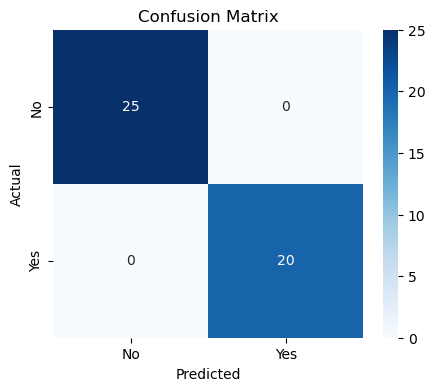

In [20]:

y_pred = tree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("conf_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


## 🌲 Visualizing the Decision Tree

Visualizing the trained Decision Tree helps us understand the structure of the model and the decision rules used for classification.

- Each internal node represents a decision on a feature.
- Each leaf node represents a class label (0 = Low Risk, 1 = High Risk).
- The `gini` value indicates the impurity of a node (lower is better).
- `samples` show how many data points reach that node.
- `value` shows the class distribution at that node.




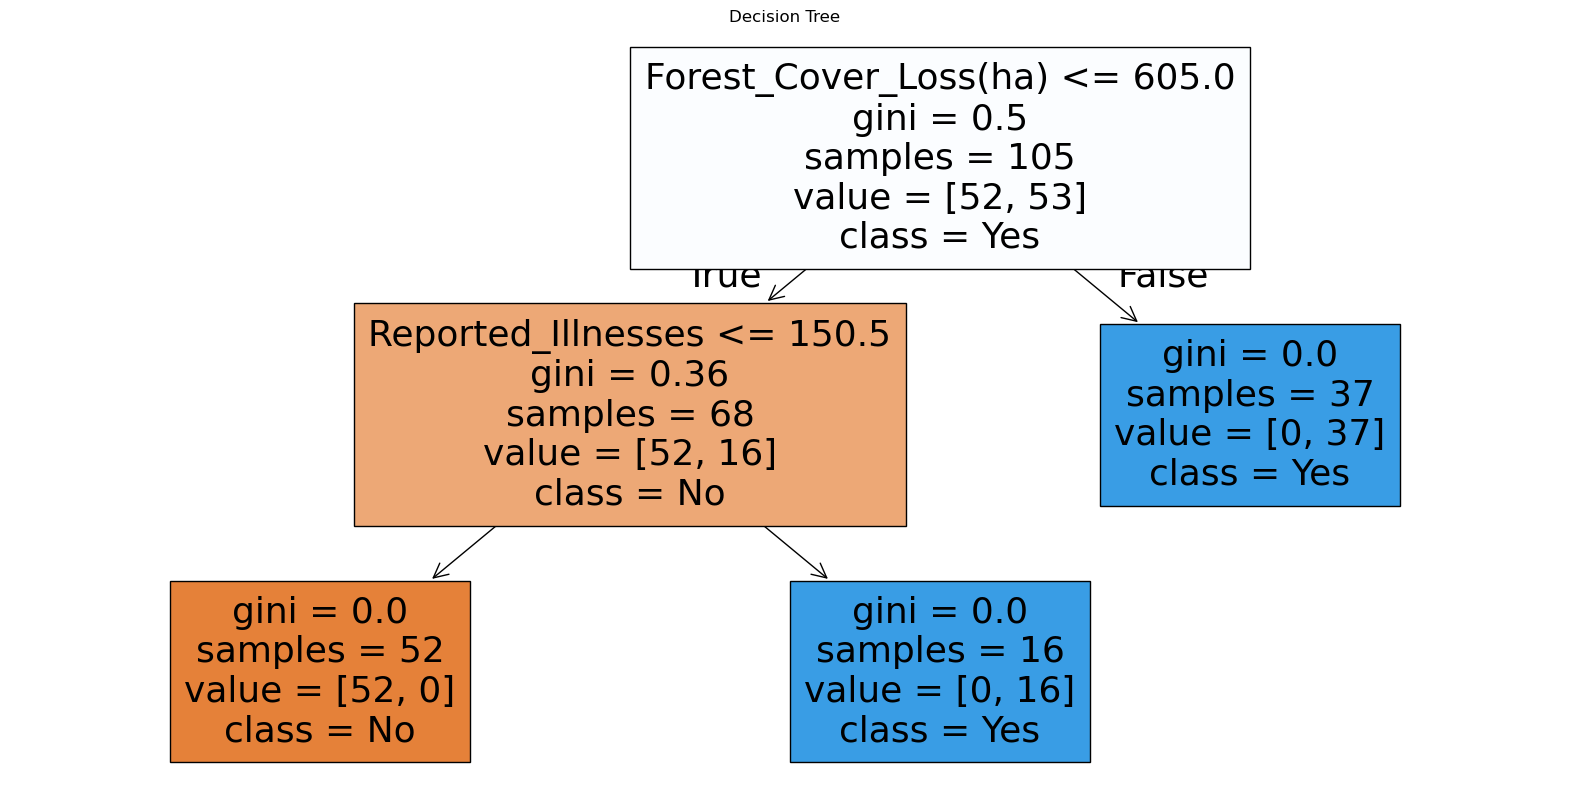

In [21]:

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.savefig("tree.png", dpi=300, bbox_inches='tight')
plt.show()


## 📊 Feature Distribution Grouped by Class



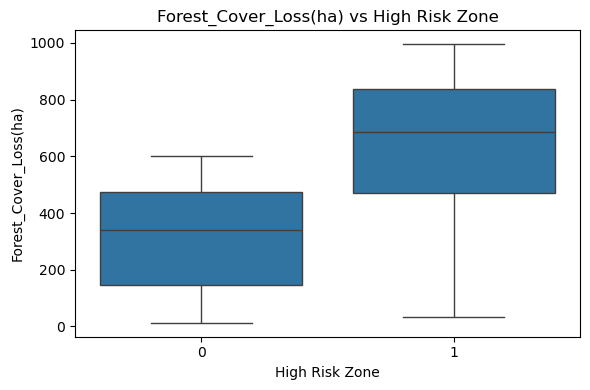

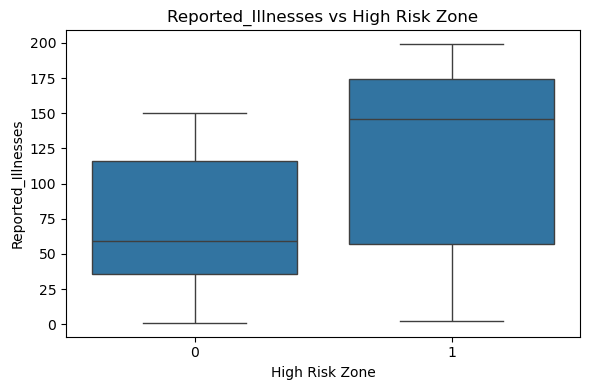

In [22]:

f=["Forest_Cover_Loss(ha)","Reported_Illnesses"]

for col in f:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs High Risk Zone")
    plt.xlabel("High Risk Zone")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## 🔗 Correlation Heatmap

This heatmap shows the correlation between different features in the dataset. Values close to +1 or -1 indicate strong relationships, while values near 0 suggest weak or no linear correlation.


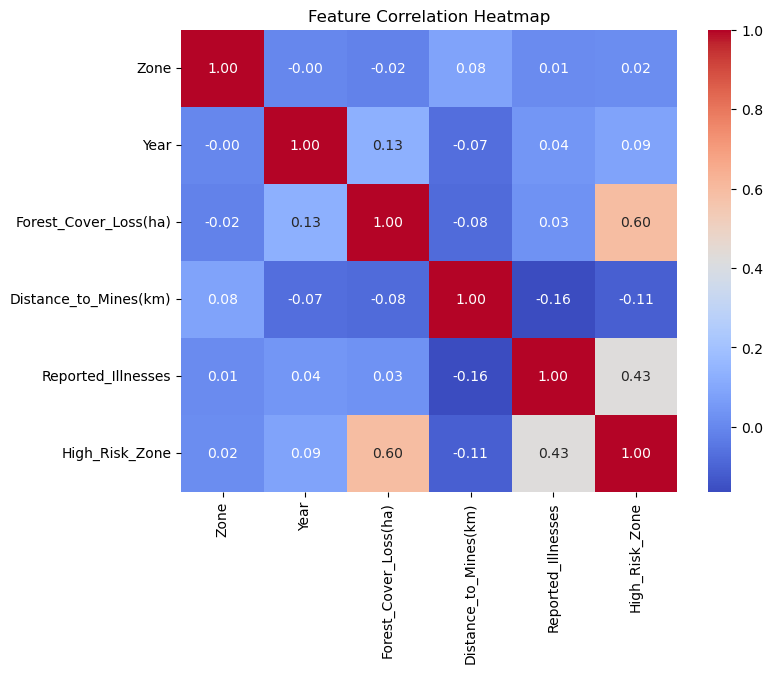

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


## 🔍 Feature Importance

This shows which features had the most influence in determining whether a zone is high-risk.

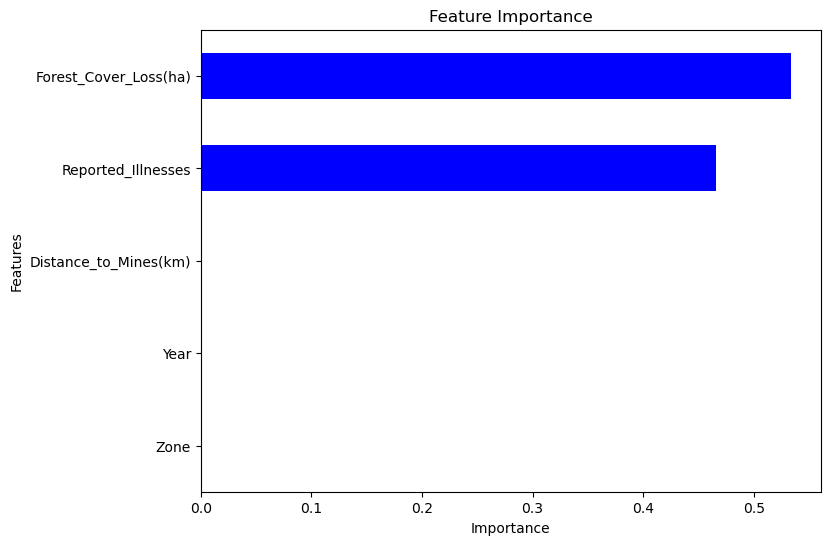

In [24]:

feat_imp = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values()
feat_imp.plot(kind='barh', color='blue', figsize=(8, 6))
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig("feature_imp.png", dpi=300, bbox_inches='tight')
plt.show()

### 🧠 From the chart above, we observe that:



- **Forest_Cover_Loss(ha)** and **Reported_Illnesses** are the most influential features in predicting high-risk zones.
- Features like **Distance_to_Mines(km)**, **Year**, and **Zone** have negligible or no impact on the model's decision-making.

This suggests that environmental degradation (forest loss) and health outcomes (illnesses) are strong indicators of risk, while other factors are not does not strongly affect the outcome


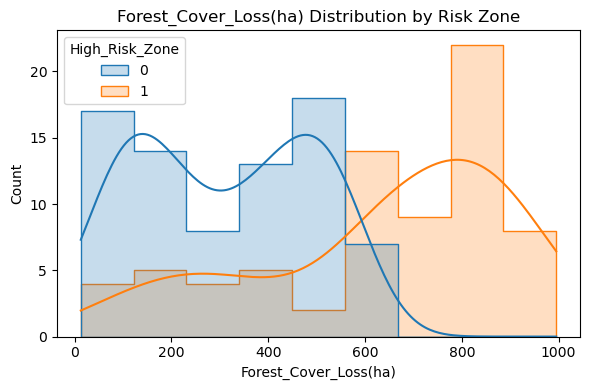

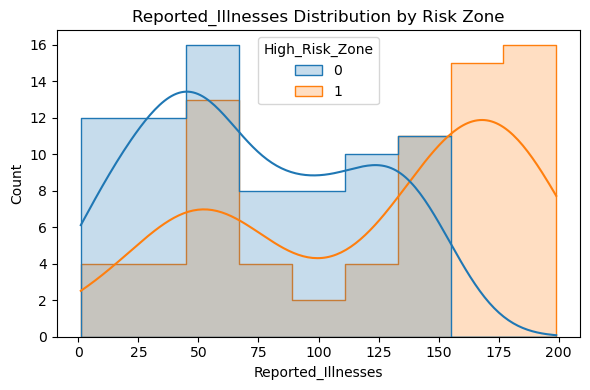

In [25]:


features_to_plot = ["Forest_Cover_Loss(ha)", "Reported_Illnesses"]

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue="High_Risk_Zone", kde=True, element="step")
    plt.title(f"{feature} Distribution by Risk Zone")
    plt.tight_layout()
    plt.savefig("feature_dis", dpi=300, bbox_inches='tight')
    plt.show()


## 🧪 Interactive Risk Prediction (Using 2 Key Features)

Predict whether a zone is at **high environmental risk** by entering just two critical inputs:

- **Forest Cover Loss (in hectares)**
- **Reported Illnesses**

The other required features are automatically filled using their average/default values:

| Feature | Value Used |
|---------|-------------|
| Zone    | Most frequent value in data |
| Year    | Average year |
| Distance to Mines (km) | Average distance |




In [26]:

default_zone = int(df['Zone'].mode()[0])  # most frequent zone
default_year = int(df['Year'].mean().round())  # average year
default_distance = round(df['Distance_to_Mines(km)'].mean(), 2)  # average distance
print("Default Zone:", default_zone)
print("Default Year:", default_year)
print("Default Distance to Mines (km):", default_distance)


Default Zone: 0
Default Year: 2017
Default Distance to Mines (km): 25.6


In [27]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Step 1: Create input widgets with styling
forest_input = widgets.BoundedFloatText(
    value=10.0,
    min=0,
    max=1000,
    step=1.0,
    description='🌲 Forest Loss (ha):',
    style={'description_width': '200px'},
    layout=widgets.Layout(width='400px')
)

illness_input = widgets.BoundedIntText(
    value=100,
    min=0,
    max=10000,
    step=1,
    description='🤒 Reported Illnesses:',
    style={'description_width': '200px'},
    layout=widgets.Layout(width='400px')
)

predict_button = widgets.Button(
    description='🚀 Predict Risk Zone',
    button_style='success',
    layout=widgets.Layout(width='250px', height='40px')
)

output = widgets.Output()

# Step 2: Define the prediction logic
def on_predict_button_clicked(b):
    with output:
        clear_output()
        
        # Get input values
        forest = forest_input.value
        illness = illness_input.value

        # Create the input row with defaults for other values
        input_row = pd.DataFrame([{
            'Zone': default_zone,
            'Year': default_year,
            'Forest_Cover_Loss(ha)': forest,
            'Distance_to_Mines(km)': default_distance,
            'Reported_Illnesses': illness
        }])

        # Make prediction
        prediction = tree_model.predict(input_row)[0]
        result = "⚠️ <b style='color:red;'>High Risk Zone</b>" if prediction == 1 else "✅ <b style='color:green;'>Low Risk Zone</b>"

        # Display result
        display(HTML(f"""
            <div style='font-size:18px; margin-top:10px;'>
                <b>📊 Input Summary:</b><br>
                - Forest Cover Loss: <b>{forest} ha</b><br>
                - Reported Illnesses: <b>{illness}</b><br><br>
                <b>🔔 Prediction Result:</b> {result}
            </div>
        """))

# Step 3: Bind button
predict_button.on_click(on_predict_button_clicked)

# Step 4: Display interface
ui = widgets.VBox([
    widgets.HTML("<h3>🧪 <u>Interactive Risk Zone Predictor</u></h3>"),
    forest_input,
    illness_input,
    predict_button,
    output
])
display(ui)


In [28]:
import pickle

# Save your model (use the one trained on all features)
with open('tree_model.pkl', 'wb') as file:
    pickle.dump(tree_model, file)


## 🏁 Conclusion

- A  model was trained using Decision Tree algorithm to predict high-risk zones with environmental data.
- Model evaluation showed good accuracy and precision.
- Feature importance analysis revealed the most influential environmental indicators.
